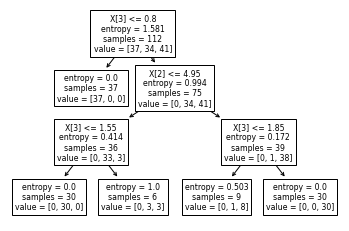

In [4]:
from arbol import *
from base import *

Arbol().test()

# iris = load_iris(as_frame=True)
# plt.plot(iris)

# print(iris.data)

1. Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [5]:
def ejercicio_uno(df_train, df_test):
  arbol = Arbol()
  clf = arbol.entrenar(df_train)
  df = arbol.predecir(df_test, clf)
  GraficadorDF(df).graph_puntos()

In [6]:
radio = 1
df_test = GeneradorDFEspiral(radio=radio, n=10000).generar_puntos_curva()

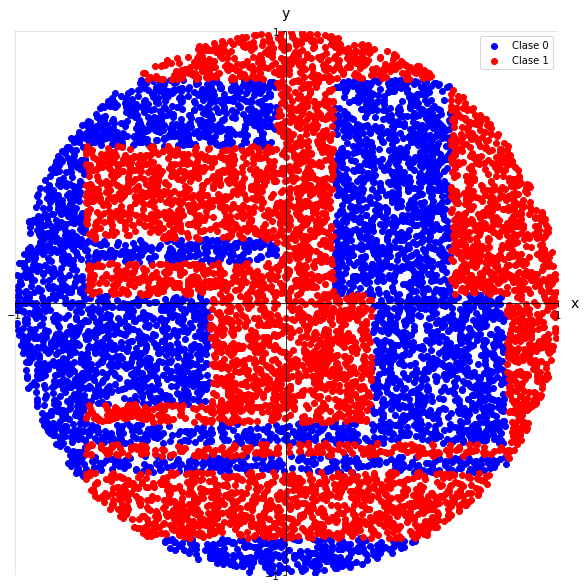

In [7]:
df_training_1 = GeneradorDFEspiral(radio=radio, n=150).generar_puntos_curva()
ejercicio_uno(df_training_1, df_test)

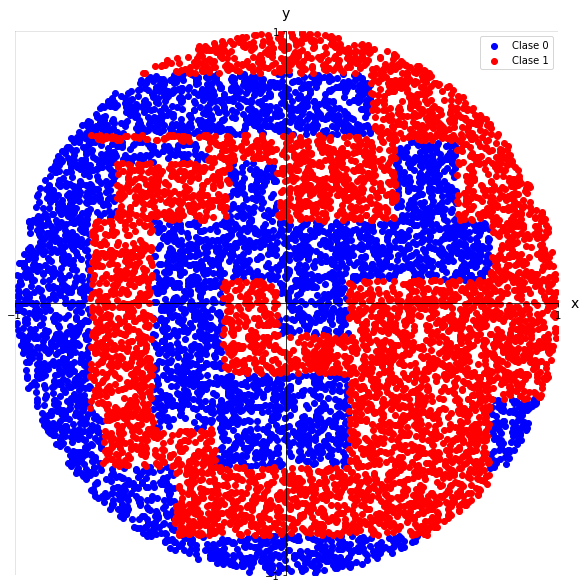

In [8]:
df_training_2 = GeneradorDFEspiral(radio=radio, n=600).generar_puntos_curva()
ejercicio_uno(df_training_2, df_test)

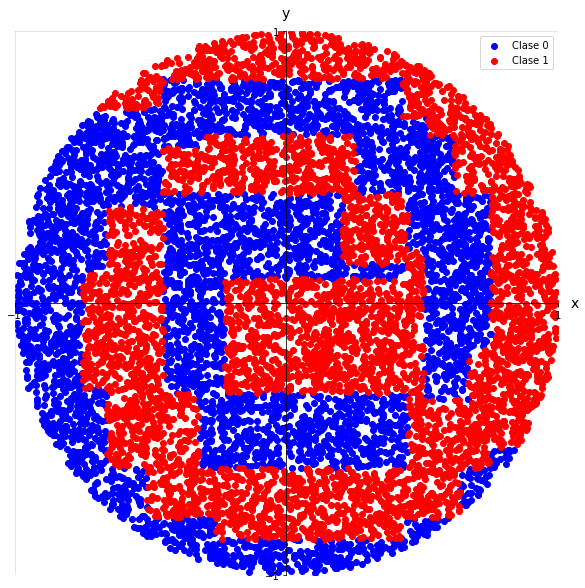

In [9]:
df_training_3 = GeneradorDFEspiral(radio=radio, n=3000).generar_puntos_curva()
ejercicio_uno(df_training_3, df_test)

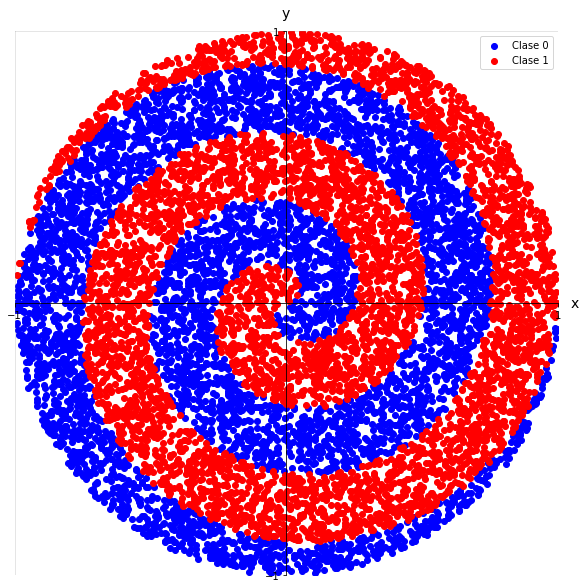

In [10]:
GraficadorDF(df_test).graph_puntos()

Las tres espirales obtenidas en la predicción muestran que sus puntos se clasifican de forma incorrecta, siendo la primera (n=150) la más diferente a la espiral esperada y la tercera (n=3000) la más semejante. Para reducir este error, es necesario contar con un conjunto de entrenamiento más grande.

---

2- Dependencia con la longitud del conjunto de entrenamiento - Sobreajuste:
 - Genere datasets usando el código desarrollado en el punto a) de la práctica 0 (vamos a llamar a estos datos "diagonal", y a los descriptos en el punto b) "paralelo"), con C = 0.78 y d = 2. 
 - Genere un único conjunto de test con n = 10000. 
 - Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. 
 - Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.
 - También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.
 - Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.

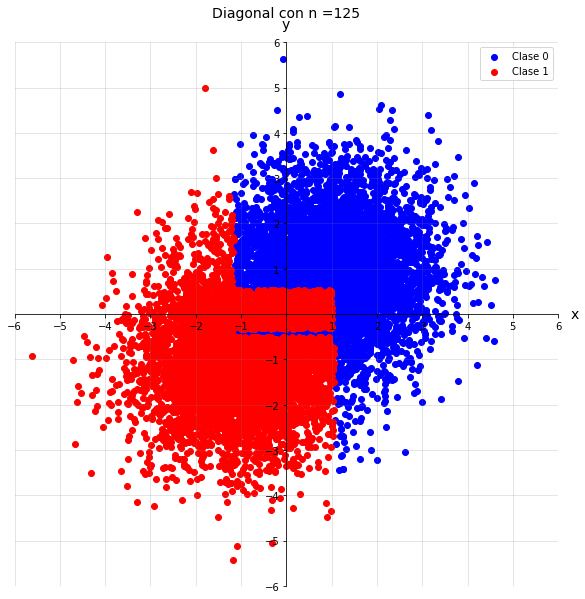

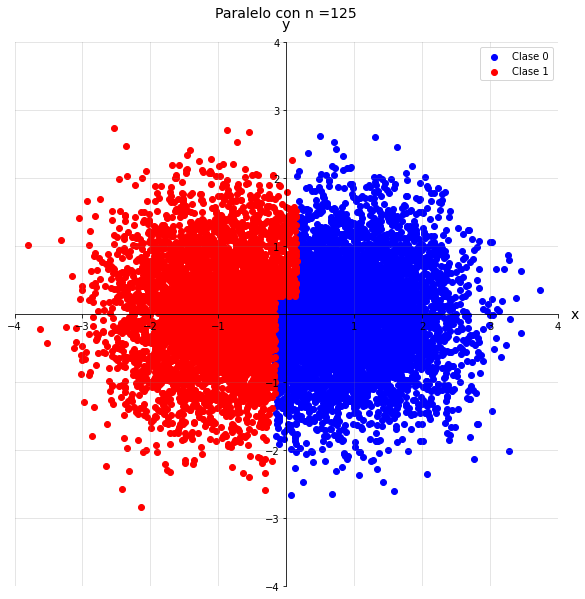

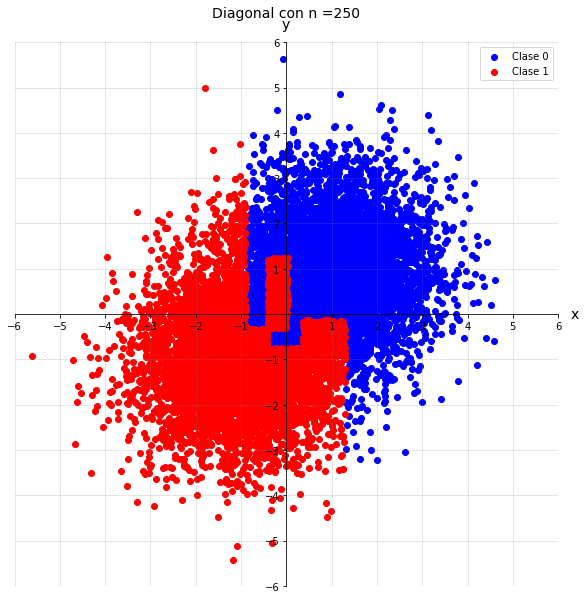

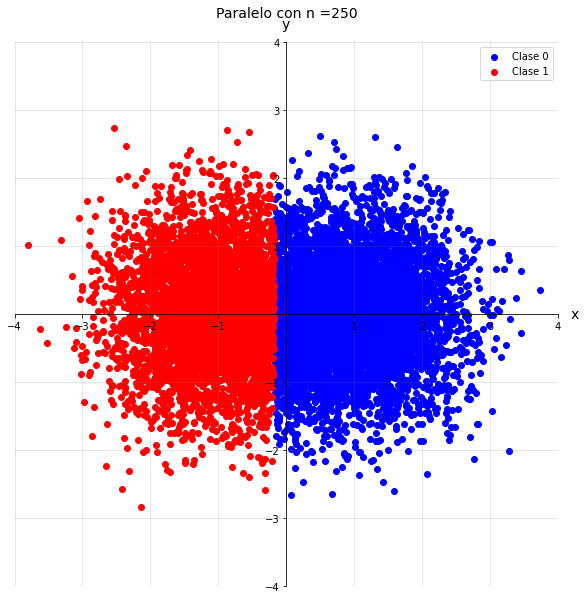

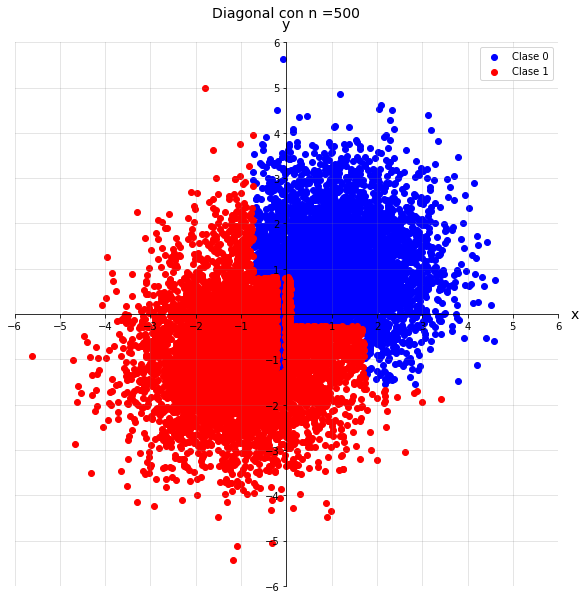

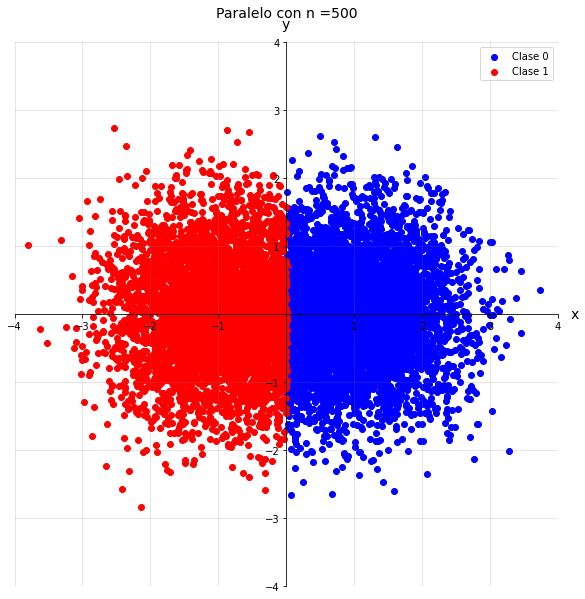

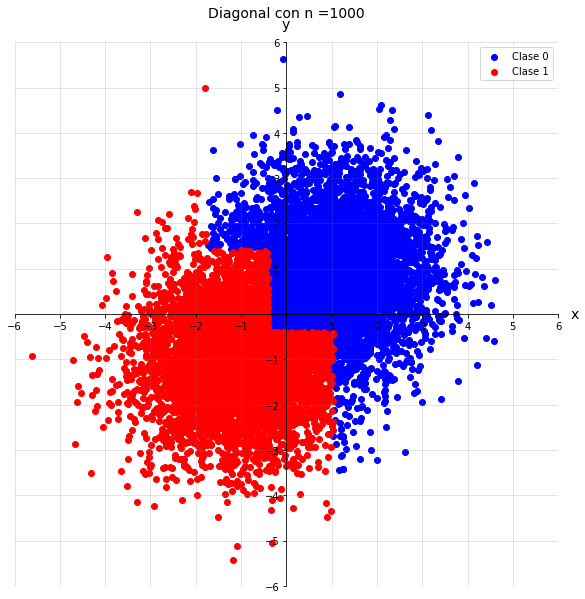

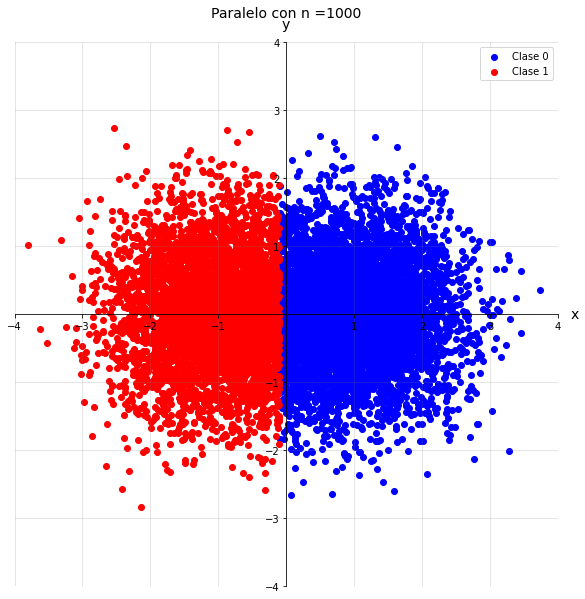

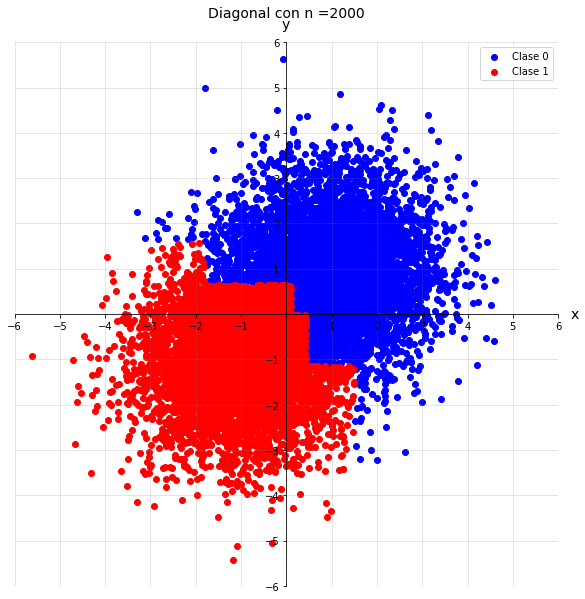

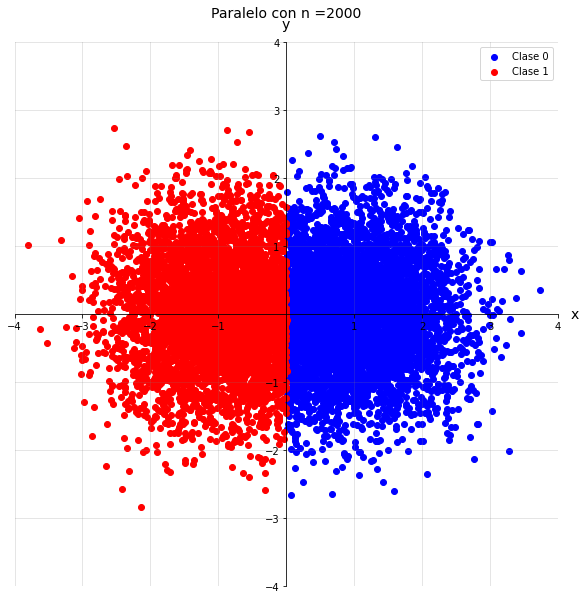

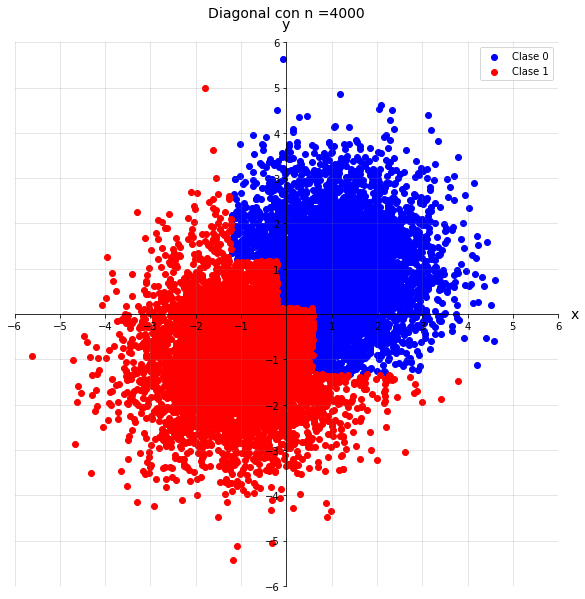

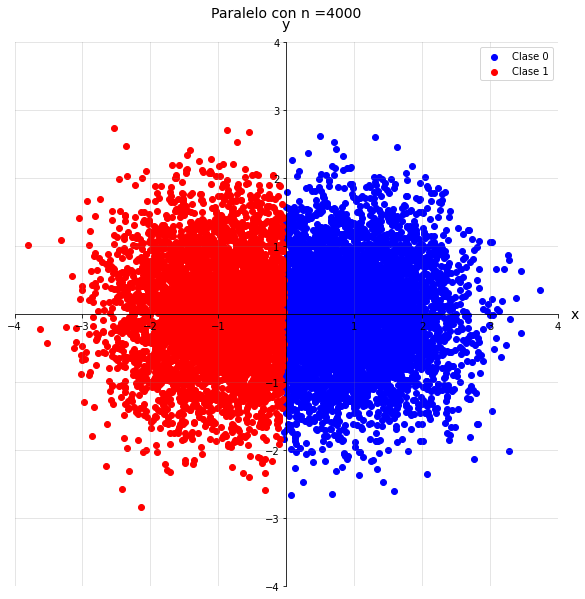

In [11]:
from sklearn.metrics import accuracy_score
df_test_diag = GeneradorDFDiagonal(C=0.78, d=2, n=10000).generar_clase()
df_test_paral = GeneradorDFParalelo(C=0.78, d=2, n=10000).generar_clase()

n_puntos = [125, 250, 500, 1000, 2000, 4000]

error_data = []
size_arbol_data = []

def calcular_error(df, df_entrenado, n, nombre, generador):
  acc_train = accuracy_score(df['Clase'], df_entrenado['Clase'])
  error_data.append([1-acc_train, n, nombre + generador])

def entrenar(n, df_test, generador):
  if generador == 'diagonal':
    df_train = GeneradorDFDiagonal(C=0.78, d=2, n=n).generar_clase()
  else:
    df_train = GeneradorDFParalelo(C=0.78, d=2, n=n).generar_clase()

  arbol = Arbol()
  clf = arbol.entrenar(df_train)
  df_train_entrenado = arbol.predecir(df_train, clf)
  df_test_entrenado = arbol.predecir(df_test, clf)

  calcular_error(df_train, df_train_entrenado, n, "Train", generador)
  calcular_error(df_test, df_test_entrenado, n, "Test", generador)
  size_arbol_data.append([clf.tree_.node_count, n, generador])

  return df_test_entrenado

for n in n_puntos:
  for i in range(20):
    df_test_diag_entrenado = entrenar(n=n, df_test=df_test_diag, generador='diagonal')
    df_test_paral_entrenado = entrenar(n=n, df_test=df_test_paral, generador='paralelo')

  GraficadorDF(df_test_diag_entrenado).graph_puntos(titulo="Diagonal con n =" + str(n))
  GraficadorDF(df_test_paral_entrenado).graph_puntos(titulo="Paralelo con n =" + str(n))

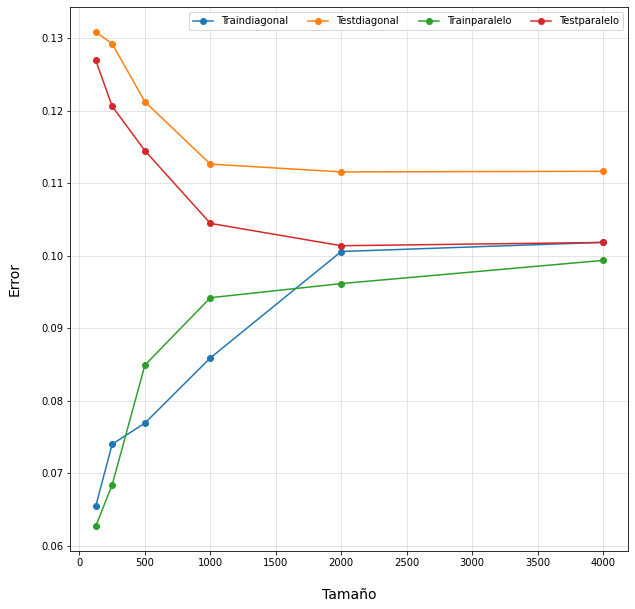

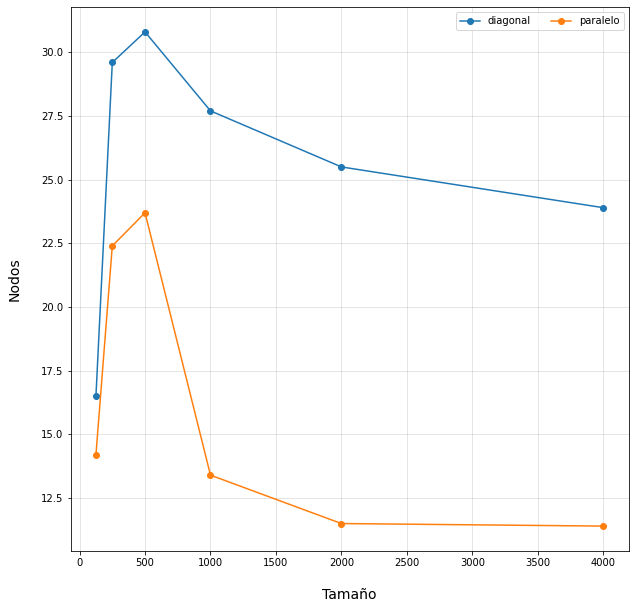

In [12]:
error_df = pd.DataFrame(error_data, columns=['Error', 'Tamaño', 'Clase'])
size_arbol_df = pd.DataFrame(size_arbol_data, columns=['Nodos', 'Tamaño', 'Clase'])

def graph_errores(error_df, referencia):
  fig, ax = plt.subplots(figsize=(10, 10))
  clases = pd.unique(error_df['Clase'])

  for c in clases:
    df = error_df[error_df['Clase'] == c]
    df = df.groupby(referencia).mean().reset_index()
    plt.plot(df[referencia], df['Error'], marker='o')

  ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

  plt.legend(clases, ncol = 4)
  plt.xlabel(referencia, size=14, labelpad=20)
  plt.ylabel('Error', size=14, labelpad=20)

def graph_size_arbol(size_arbol_df):
  fig, ax = plt.subplots(figsize=(10, 10))
  clases = pd.unique(size_arbol_df['Clase'])

  for c in clases:
    df = size_arbol_df[size_arbol_df['Clase'] == c]
    df = df.groupby('Tamaño').mean().reset_index()
    plt.plot(df['Tamaño'], df['Nodos'], marker='o')

  ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

  plt.legend(clases, ncol = 4)
  plt.xlabel('Tamaño', size=14, labelpad=20)
  plt.ylabel('Nodos', size=14, labelpad=20)

graph_errores(error_df, referencia='Tamaño')
graph_size_arbol(size_arbol_df)

Las predicciones del dataset paralelo parecen ser satisfactorias a partir de n = 1000 y las del dataset diagonal a partir de n = 2000. Observando el gráfico de errores, se puede destacar que el error sobre los conjuntos de entrenamiento no disminuye a partir de n=2000, por lo que dicho valor sería suficiente para fijar el tamaño del mismo. 

Respecto al gráfico de nodos, se aprecia un salto pronunciado entre n = 250 y n = 500 y luego se estabiliza a partir de n = 2000. El gráfico de errores también indica que en dichos tamaños el error de los datasets de prueba son mucho mayores a los de entrenamiento, por lo tanto se puede concluir que se produjo overfitting. 

---

3- Resistencia al ruido:

 - Genere datasets con d = 5, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando el valor de C (overlapping de las clases) de 0.5 a 2.5 con incrementos de 0.5. 
 - Como en el punto anterior, para cada valor dado de C cree 20 conjuntos distintos de entrenamiento, pero uno solo de test. 
 - Genere una gráfica del test-error en función de C para el problema "paralelo" y el "diagonal" (sólo los promedios de los 20 conjuntos para cada valor de C). También incluya en la gráfica los valores mínimos que se piden en el opcional 6.1 (el que no haga el opcional me los puede pedir a mi). Todos los resultados de los dos problemas y el error mínimo en la misma gráfica. Discuta los resultados.

3.1- Opcional:
Puede calcular para cada valor de C cuál es el mínimo error que se puede conseguir? Cómo se comparan dichos valores con los obtenidos con el árbol? Obtenga una curva de error mínimo y agréguela a la gráfica anterior. Explique brevemente cómo obtuvo los valores mínimos.
Hay varias maneras de hacerlo. Una simple es imaginando cual es el clasificador ideal o de mínimo error para este problema (a ese clasificador se lo llama "clasificador de Bayes") y midiendo directamente sobre un conjunto de test grande (10000 puntos para d=5) cuántos puntos son mal clasificados por ese clasificador ideal.

In [13]:
# Una idea de clasificador ideal podría ser a partir de la distancia euclidiana 
# entre el punto a clasificar y los centros de cada clase. De esta forma, el punto
# pertenecería a la clase cuya distancia a su centro sea mínima.

def clasificador_ideal(df, centro_1, centro_2):
  df_ideal = df.copy(deep = True)
  puntos = df_ideal.drop('Clase', axis=1).values.tolist()
  clases = []

  for p in puntos:
    delta_a = np.sqrt(np.sum(np.square(p - centro_1)))
    delta_b = np.sqrt(np.sum(np.square(p - centro_2)))

    if delta_a < delta_b: clases.append(0) 
    else: clases.append(1)

  df_ideal['Clase'] = clases
  return df_ideal

def clasificador_ideal_diagonal(df):
  d = len(df.columns) - 1
  centro_1 = np.repeat(1, d)
  centro_2 = np.repeat(-1, d)
  return clasificador_ideal(df, centro_1, centro_2)

def clasificador_ideal_paralelo(df):
  d = len(df.columns) - 1
  centro_1 = np.append([1], np.repeat(0, d-1))
  centro_2 = np.append([-1], np.repeat(0, d-1))
  return clasificador_ideal(df, centro_1, centro_2)

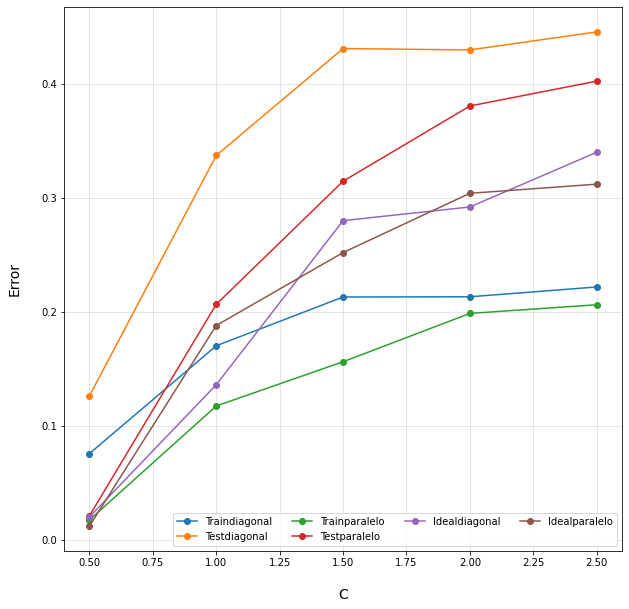

In [14]:
C_valores = [0.5, 1.0, 1.5, 2.0, 2.5]
error_data = []

def entrenar_C(C, df_test, generador):
  if generador == 'diagonal':
    df_train = GeneradorDFDiagonal(C=C, d=5, n=250).generar_clase()
  else:
    df_train = GeneradorDFParalelo(C=C, d=5, n=250).generar_clase()

  arbol = Arbol()
  clf = arbol.entrenar(df_train)
  df_train_entrenado = arbol.predecir(df_train, clf)
  df_test_entrenado = arbol.predecir(df_test, clf)

  calcular_error(df_train, df_train_entrenado, C, "Train", generador)
  calcular_error(df_test, df_test_entrenado, C, "Test", generador)

  return df_test_entrenado

for C in C_valores:
  df_test_diag = GeneradorDFDiagonal(C=C, d=5, n=250).generar_clase()
  df_test_paral = GeneradorDFParalelo(C=C, d=5, n=250).generar_clase()
  for i in range(20):
    df_test_diag_entrenado = entrenar_C(C=C, df_test=df_test_diag, generador='diagonal')
    df_test_paral_entrenado = entrenar_C(C=C, df_test=df_test_paral, generador='paralelo')
  
  # calcular errores mínimos
  ideal_diagonal = clasificador_ideal_diagonal(df_test_diag)
  ideal_paralelo = clasificador_ideal_paralelo(df_test_paral)

  calcular_error(df_test_diag, ideal_diagonal, C, "Ideal", generador='diagonal')
  calcular_error(df_test_paral, ideal_paralelo, C, "Ideal", generador='paralelo')

error_df = pd.DataFrame(error_data, columns=['Error', 'C', 'Clase'])
graph_errores(error_df, referencia='C')

A medida que aumenta C -que es el valor de overlapping entre clases- se puede apreciar que el error también crece. Notar que los errores de los datasets obtenidos con el clasificador ideal son menores a los de test pero aún así presentan valores relativamente altos, por lo cual podemos asumir que sus datos no son inmunes al ruido. 

---

4. Dimensionalidad:

 - Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. 
 - Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. 
 - Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.

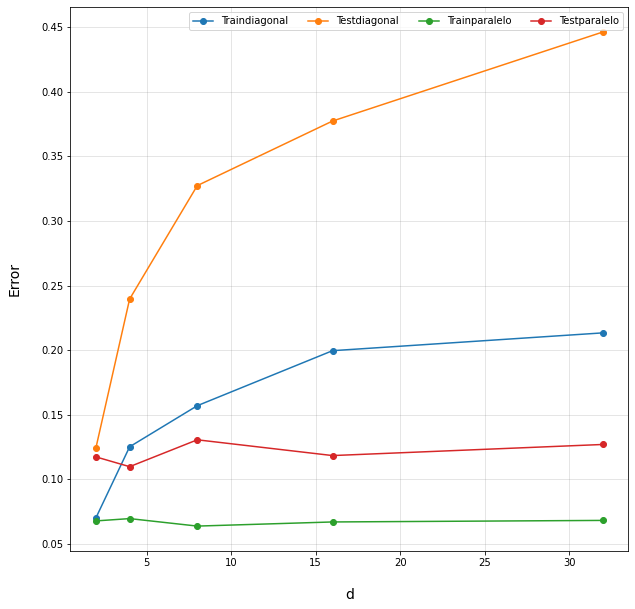

In [15]:
d_valores = [2, 4, 8, 16, 32]
error_data = []

def entrenar_d(d, df_test, generador):
  if generador == 'diagonal':
    df_train = GeneradorDFDiagonal(C=0.78, d=d, n=250).generar_clase()
  else:
    df_train = GeneradorDFParalelo(C=0.78, d=d, n=250).generar_clase()

  arbol = Arbol()
  clf = arbol.entrenar(df_train)
  df_train_entrenado = arbol.predecir(df_train, clf)
  df_test_entrenado = arbol.predecir(df_test, clf)

  calcular_error(df_train, df_train_entrenado, d, "Train", generador)
  calcular_error(df_test, df_test_entrenado, d, "Test", generador)

  return df_test_entrenado

for d in d_valores:
  df_test_diag = GeneradorDFDiagonal(C=0.78, d=d, n=250).generar_clase()
  df_test_paral = GeneradorDFParalelo(C=0.78, d=d, n=250).generar_clase()
  for i in range(20):
    df_test_diag_entrenado = entrenar_d(d=d, df_test=df_test_diag, generador='diagonal')
    df_test_paral_entrenado = entrenar_d(d=d, df_test=df_test_paral, generador='paralelo')

  ideal_diagonal = clasificador_ideal_diagonal(df_test_diag)
  ideal_paralelo = clasificador_ideal_paralelo(df_test_paral)

error_df = pd.DataFrame(error_data, columns=['Error', 'd', 'Clase'])
graph_errores(error_df, referencia='d')

Se puede apreciar que el error con los datasets del problema diagonal son mayores a los del problema paralelo. Podríamos suponer que la dimensionalidad aumenta las probabilidades de insertar ruido en los datos.